In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os
import pickle

## Loading Synthetic Data

In [8]:
data1 = pd.DataFrame()

file_path = 'synth_renders/invalid_floorplans.txt'

with open(file_path, 'r') as file:
    content_list = file.read().splitlines()

data1['key'] = content_list
data1['label'] = 0

def image_path(key):
    return f"synth_renders/invalid_floorplans/{key}"

data1['image_path'] = data1['key'].apply(image_path)

data1

,key,label,image_path
0,006a2d3bb2b7435fb6d96e7f320efe42_wout_0_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
1,006a2d3bb2b7435fb6d96e7f320efe42_wout_10_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
2,006a2d3bb2b7435fb6d96e7f320efe42_wout_11_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
3,006a2d3bb2b7435fb6d96e7f320efe42_wout_12_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
4,006a2d3bb2b7435fb6d96e7f320efe42_wout_13_Top.png,0,synth_renders/invalid_floorplans/006a2d3bb2b74...
...,...,...,...
645,1c0e78764f794b88922ea3e511446274_wout_5_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...
646,1c0e78764f794b88922ea3e511446274_wout_6_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...
647,1c0e78764f794b88922ea3e511446274_wout_7_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...
648,1c0e78764f794b88922ea3e511446274_wout_8_Top.png,0,synth_renders/invalid_floorplans/1c0e78764f794...


In [9]:
data2 = pd.DataFrame()

file_path = 'synth_renders/valid_floorplans.txt'

with open(file_path, 'r') as file:
    content_list = file.read().splitlines()

data2['key'] = content_list
data2['label'] = 1

def image_path(key):
    return f"synth_renders/valid_floorplans/{key}"

data2['image_path'] = data2['key'].apply(image_path)

data2

,key,label,image_path
0,006a2d3bb2b7435fb6d96e7f320efe42_wout_1_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
1,006a2d3bb2b7435fb6d96e7f320efe42_wout_27_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
2,006a2d3bb2b7435fb6d96e7f320efe42_wout_2_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
3,006a2d3bb2b7435fb6d96e7f320efe42_wout_44_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
4,006a2d3bb2b7435fb6d96e7f320efe42_wout_48_Top.png,1,synth_renders/valid_floorplans/006a2d3bb2b7435...
...,...,...,...
640,bfb7f53ccc0242588a8f6898e502d10f_wout_6_Top.png,1,synth_renders/valid_floorplans/bfb7f53ccc02425...
641,bfb7f53ccc0242588a8f6898e502d10f_wout_7_Top.png,1,synth_renders/valid_floorplans/bfb7f53ccc02425...
642,bfc0d80669bf40fd9c001975e31c56ce_wout_0_Top.png,1,synth_renders/valid_floorplans/bfc0d80669bf40f...
643,bfc0d80669bf40fd9c001975e31c56ce_wout_1_Top.png,1,synth_renders/valid_floorplans/bfc0d80669bf40f...


In [10]:
data = pd.concat([data1, data2], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)
data 

,key,label,image_path
0,01c1ac1113dc4770a2690dc9e7218859_wout_11_Top.png,0,synth_renders/invalid_floorplans/01c1ac1113dc4...
1,5d581aebeb4a4b5bb50d2f3391f3dda0_wout_0_Top.png,1,synth_renders/valid_floorplans/5d581aebeb4a4b5...
2,6adaf6ab2daa43ee9a87f3571060828f_wout_9_Top.png,1,synth_renders/valid_floorplans/6adaf6ab2daa43e...
3,05ba138f134a49fc8a3dcac6d26fb024_wout_14_Top.png,1,synth_renders/valid_floorplans/05ba138f134a49f...
4,0cfd5f8329e44d9d9836f05113fe8710_wout_1_Top.png,0,synth_renders/invalid_floorplans/0cfd5f8329e44...
...,...,...,...
1290,05b8e14c1cbc48f3b50491c0597f3e28_wout_2_Top.png,0,synth_renders/invalid_floorplans/05b8e14c1cbc4...
1291,5d581aebeb4a4b5bb50d2f3391f3dda0_wout_25_Top.png,1,synth_renders/valid_floorplans/5d581aebeb4a4b5...
1292,15c7ad147902490fbed1d1cac5539c27_wout_14_Top.png,0,synth_renders/invalid_floorplans/15c7ad1479024...
1293,106fdea4566442fcb3cafcabbcf636e6_wout_3_Top.png,0,synth_renders/invalid_floorplans/106fdea456644...


In [11]:
data['image'] = data['image_path'].map(lambda x: np.asarray(Image.open(x).resize((224,224)).convert('RGB'))) 

## Applying Image Filters

In [35]:
import cv2
import numpy as np
from PIL import Image

def apply_filters(image_path):
    img = Image.open(image_path).resize((224, 224)).convert('RGB')
    img_array = np.array(img)

    laplacian_image = cv2.Laplacian(img_array, cv2.CV_64F)
    gaussian_image = cv2.GaussianBlur(img_array, (5, 5), 1)
    

    laplacian_image = np.abs(laplacian_image) / np.max(np.abs(laplacian_image))
    gaussian_image = gaussian_image / 255.0

    laplacian_image_pil = Image.fromarray(np.uint8(laplacian_image * 255))
    gaussian_image_pil = Image.fromarray(np.uint8(gaussian_image * 255))

    return img, laplacian_image_pil, gaussian_image_pil


data[['original_image', 'laplacian_image', 'gaussian_image']] = data['image_path'].apply(apply_filters).apply(pd.Series)

In [ ]:
original_image = Image.open('chair.jpeg')


resized_image = original_image.resize((224, 224))

resized_image_array = np.array(resized_image)
laplacian_image = cv2.Laplacian(resized_image_array, cv2.CV_64F)
laplacian_image_pil = Image.fromarray(np.uint8(np.abs(laplacian_image)))
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(resized_image)
axes[0].set_title('Resized Image (224x224)')
axes[0].axis('off')

axes[1].imshow(laplacian_image_pil)
axes[1].set_title('Laplacian Filtered Image')
axes[1].axis('off')

plt.show()


In [15]:
data['image'] = [arr.astype(np.int16) for arr in data['image']]

In [ ]:
plt.imshow(data.original_image[24])

In [ ]:
plt.imshow(data.laplacian_image[24])

In [ ]:
plt.imshow(data.gaussian_image[24])

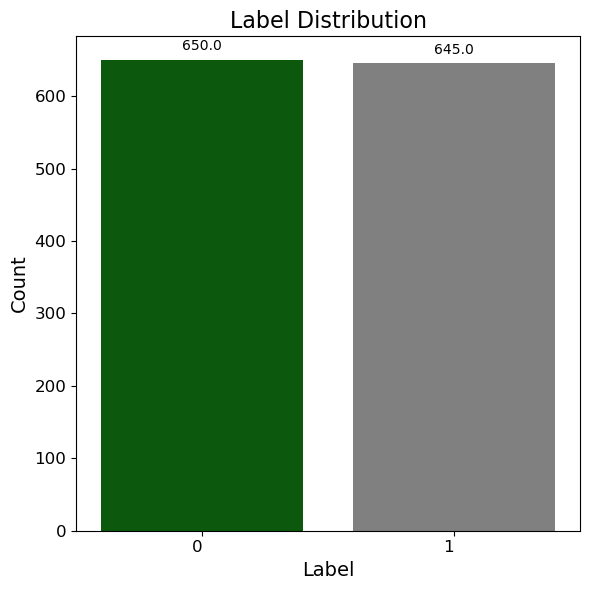

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


custom_palette = sns.color_palette(['darkgreen', 'grey'])

plt.figure(figsize=(6, 6))
ax = sns.countplot(x='label', data=data, palette=custom_palette, order=data['label'].value_counts().index)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Label Distribution', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## Loading VGG19 Model

In [36]:
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from tqdm import tqdm

In [37]:
base_model = VGG19(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

## Creating embeddings for Images

In [38]:
def get_embedding(model, pil_img):
    if pil_img.size != (224, 224):
        pil_img = pil_img.resize((224, 224))
    img_data = np.array(pil_img)
    img_data = preprocess_input(img_data)

    embedding_vector = model.predict(np.expand_dims(img_data, axis=0))

    embedding_vector_flatten = embedding_vector.flatten()
    return embedding_vector_flatten

def process_images(image_list, model, batch_size=32):
    embeddings = []
    
    for i in tqdm(range(0, len(image_list), batch_size)):
        batch = image_list[i:i+batch_size]
        batch_images = [np.array(img) for img in batch]
        batch_images = np.array(batch_images)
        batch_images = preprocess_input(batch_images)
        
        batch_embeddings = model.predict(batch_images)
    
        for embedding in batch_embeddings:
            embeddings.append(embedding.flatten())
    
    return embeddings

In [39]:
embeddings = process_images(data.laplacian_image, model, batch_size=32)

  0%|                                                    | 0/41 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


  2%|█                                           | 1/41 [00:02<01:49,  2.73s/it]

1/1 [==============================] - 3s 3s/step


  5%|██▏                                         | 2/41 [00:05<01:45,  2.69s/it]

1/1 [==============================] - 3s 3s/step


  7%|███▏                                        | 3/41 [00:08<01:41,  2.67s/it]

1/1 [==============================] - 3s 3s/step


 10%|████▎                                       | 4/41 [00:10<01:38,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 12%|█████▎                                      | 5/41 [00:13<01:35,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 15%|██████▍                                     | 6/41 [00:15<01:32,  2.66s/it]

1/1 [==============================] - 3s 3s/step


 17%|███████▌                                    | 7/41 [00:18<01:30,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 20%|████████▌                                   | 8/41 [00:21<01:27,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 22%|█████████▋                                  | 9/41 [00:23<01:24,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 24%|██████████▍                                | 10/41 [00:26<01:22,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 27%|███████████▌                               | 11/41 [00:29<01:19,  2.65s/it]

1/1 [==============================] - 3s 3s/step


 29%|████████████▌                              | 12/41 [00:31<01:17,  2.67s/it]

1/1 [==============================] - 4s 4s/step


 32%|█████████████▋                             | 13/41 [00:36<01:28,  3.17s/it]

1/1 [==============================] - 4s 4s/step


 34%|██████████████▋                            | 14/41 [00:40<01:33,  3.46s/it]

1/1 [==============================] - 3s 3s/step


 37%|███████████████▋                           | 15/41 [00:43<01:23,  3.23s/it]

1/1 [==============================] - 3s 3s/step


 39%|████████████████▊                          | 16/41 [00:45<01:18,  3.12s/it]

1/1 [==============================] - 3s 3s/step


 41%|█████████████████▊                         | 17/41 [00:48<01:12,  3.00s/it]

1/1 [==============================] - 3s 3s/step


 44%|██████████████████▉                        | 18/41 [00:51<01:06,  2.91s/it]

1/1 [==============================] - 3s 3s/step


 46%|███████████████████▉                       | 19/41 [00:54<01:02,  2.85s/it]

1/1 [==============================] - 3s 3s/step


 49%|████████████████████▉                      | 20/41 [00:56<00:59,  2.82s/it]

1/1 [==============================] - 3s 3s/step


 51%|██████████████████████                     | 21/41 [01:00<00:58,  2.94s/it]

1/1 [==============================] - 4s 4s/step


 54%|███████████████████████                    | 22/41 [01:04<01:04,  3.38s/it]

1/1 [==============================] - 3s 3s/step


 56%|████████████████████████                   | 23/41 [01:07<01:00,  3.34s/it]

1/1 [==============================] - 3s 3s/step


 59%|█████████████████████████▏                 | 24/41 [01:10<00:53,  3.16s/it]

1/1 [==============================] - 3s 3s/step


 61%|██████████████████████████▏                | 25/41 [01:13<00:48,  3.03s/it]

1/1 [==============================] - 3s 3s/step


 63%|███████████████████████████▎               | 26/41 [01:15<00:43,  2.93s/it]

1/1 [==============================] - 4s 4s/step


 66%|████████████████████████████▎              | 27/41 [01:20<00:46,  3.35s/it]

1/1 [==============================] - 4s 4s/step


 68%|█████████████████████████████▎             | 28/41 [01:24<00:47,  3.68s/it]

1/1 [==============================] - 4s 4s/step


 71%|██████████████████████████████▍            | 29/41 [01:29<00:46,  3.90s/it]

1/1 [==============================] - 4s 4s/step


 73%|███████████████████████████████▍           | 30/41 [01:33<00:44,  4.05s/it]

1/1 [==============================] - 4s 4s/step


 76%|████████████████████████████████▌          | 31/41 [01:37<00:41,  4.17s/it]

1/1 [==============================] - 4s 4s/step


 78%|█████████████████████████████████▌         | 32/41 [01:42<00:38,  4.26s/it]

1/1 [==============================] - 4s 4s/step


 80%|██████████████████████████████████▌        | 33/41 [01:46<00:34,  4.32s/it]

1/1 [==============================] - 4s 4s/step


 83%|███████████████████████████████████▋       | 34/41 [01:51<00:30,  4.35s/it]

1/1 [==============================] - 4s 4s/step


 85%|████████████████████████████████████▋      | 35/41 [01:55<00:26,  4.37s/it]

1/1 [==============================] - 4s 4s/step


 88%|█████████████████████████████████████▊     | 36/41 [02:00<00:21,  4.40s/it]

1/1 [==============================] - 4s 4s/step


 90%|██████████████████████████████████████▊    | 37/41 [02:03<00:16,  4.22s/it]

1/1 [==============================] - 3s 3s/step


 93%|███████████████████████████████████████▊   | 38/41 [02:06<00:11,  3.76s/it]

1/1 [==============================] - 3s 3s/step


 95%|████████████████████████████████████████▉  | 39/41 [02:09<00:06,  3.44s/it]

1/1 [==============================] - 3s 3s/step


 98%|█████████████████████████████████████████▉ | 40/41 [02:12<00:03,  3.23s/it]

1/1 [==============================] - 1s 1s/step


100%|███████████████████████████████████████████| 41/41 [02:13<00:00,  3.25s/it]


Text(0.5, 1.0, 'VGG19 Features(25088) of an Image')

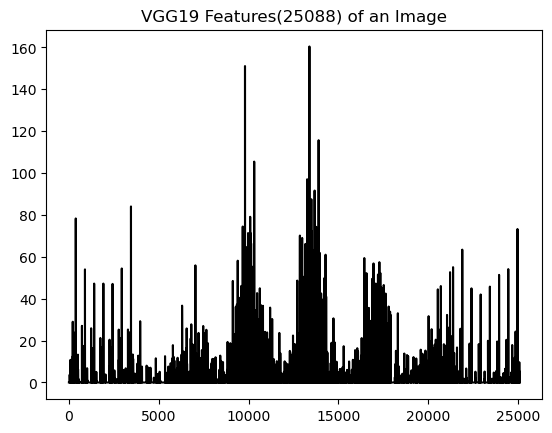

In [20]:
plt.plot(embeddings[0],color='black')
plt.title(f'VGG19 Features({len(embeddings[0])}) of an Image')

## KNN Classifier

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [41]:
embeddings = np.array(embeddings)
label_int = np.array(data.label.values.astype(int))

In [56]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, label_int, test_size=0.2, random_state=54)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       120
           1       0.99      0.91      0.95       139

    accuracy                           0.95       259
   macro avg       0.95      0.95      0.95       259
weighted avg       0.95      0.95      0.95       259

Accuracy: 0.9459459459459459




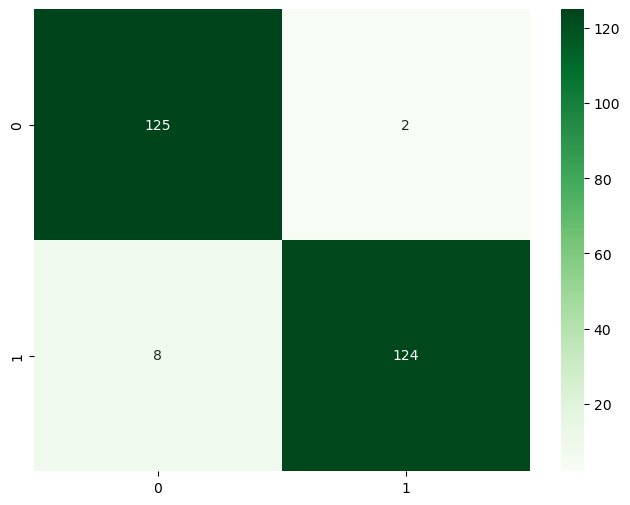

In [59]:
k = 2
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

pickle_file_path = 'knn_model_best.pkl'

with open(pickle_file_path, 'wb') as file:
    pickle.dump(knn, file)

y_pred1 = knn.predict(X_test)

print(classification_report(y_test, y_pred1))
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")

## Laplacian images = 94.98(without normalization), 95.366%(Normalization)
## guassian images = 94.59(Both same)
print("\n")
cm = confusion_matrix(y_test,y_pred1)
cm = [[125,2],[8,124]   ]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.show()

## XGBoost Model

In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(X_train, y_train)

y_pred2 = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred2))
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")

## Laplacian = 93.436

## 2-Layer FFN

In [53]:
encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(label_int)

labels_categorical = to_categorical(labels_encoded) 

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels_categorical, test_size=0.2, random_state=34)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(y_train.shape[1], activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',               
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=26, batch_size=32, verbose=1, validation_split=0.1)

scores = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))
print(f"Accuracy: {scores[1]}")

## Laplacian = 95.75 and 96.138

Epoch 1/26
30/30 [==============================] - 0s 5ms/step - loss: 1.7582 - accuracy: 0.8584 - val_loss: 0.2389 - val_accuracy: 0.9519
Epoch 2/26
30/30 [==============================] - 0s 3ms/step - loss: 0.2245 - accuracy: 0.9571 - val_loss: 0.2741 - val_accuracy: 0.9519
Epoch 3/26
30/30 [==============================] - 0s 3ms/step - loss: 0.2150 - accuracy: 0.9549 - val_loss: 0.2093 - val_accuracy: 0.9615
Epoch 4/26
30/30 [==============================] - 0s 3ms/step - loss: 0.4005 - accuracy: 0.9549 - val_loss: 0.2892 - val_accuracy: 0.9615
Epoch 5/26
30/30 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.9582 - val_loss: 0.2782 - val_accuracy: 0.9808
Epoch 6/26
30/30 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.9464 - val_loss: 0.4340 - val_accuracy: 0.9615
Epoch 7/26
30/30 [==============================] - 0s 3ms/step - loss: 0.1993 - accuracy: 0.9603 - val_loss: 0.0700 - val_accuracy: 0.9808
Epoch 8/26
30/30 [==

In [ ]:
pickle_file_path = 'Fnn_model_best.pkl'

with open(pickle_file_path, 'wb') as file:
    pickle.dump(model, file)


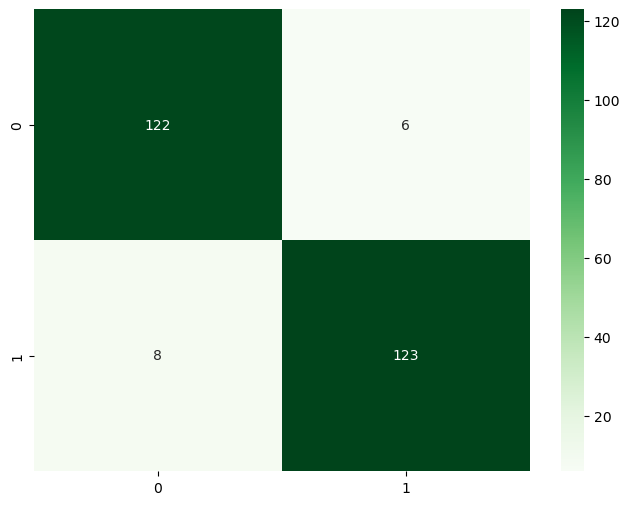

In [54]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.show()

## Voting Classifer

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

knn_model1 = KNeighborsClassifier(n_neighbors=1)
knn_model2 = KNeighborsClassifier(n_neighbors=2)
knn_model3 = KNeighborsClassifier(n_neighbors=3)
# xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
# svc_model = SVC(probability=True)
# rf_model = RandomForestClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('knn1', knn_model1),
        ('knn2', knn_model2),
        ('knn3', knn_model3)
    ],
    voting='hard'
)
## Tried different approaches

In [ ]:
voting_clf.fit(X_train, y_train)

predictions = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Ensemble Accuracy: {accuracy}")

## Lasso Feature selection

In [ ]:
from sklearn.linear_model import Lasso

alpha = 0.0001 ## Increasing makes more features sparse
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train1, y_train1)
klp = lasso_model.predict(X_test1)

In [ ]:
Lasso_features = []
for i in X_train1:
    Lasso_features.append(np.array(i[lasso_model.coef_[0] != 0]))
Lasso_features = np.array(Lasso_features)

Lasso_x_test_features = []
for i in X_test1:
    Lasso_x_test_features.append(np.array(i[lasso_model.coef_[0] != 0]))
Lasso_x_test_features = np.array(Lasso_x_test_features)

In [ ]:
print(f'{len(X_train[0])},{len(Lasso_features[0])}')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(X_train[0], label='VGG19 Features - 0.', marker='o', linestyle='-', color='grey')

ax.plot(Lasso_features[0], label='Lasso features', marker='s', linestyle='--', color='black')

ax.set_xlabel('Feature Index')
ax.set_ylabel('Feature Value')
ax.set_title('Comparison of Features')
ax.legend()

plt.show()

## KNN with Lasso Features

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=8) 
knn_model.fit(Lasso_features, y_train1)
y_pred = knn_model.predict(Lasso_x_test_features)
print(accuracy_score(y_test1, y_pred))
print(classification_report(y_test1,y_pred))

cm = confusion_matrix(np.argmax(y_test1, axis=1), np.argmax(y_pred, axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.show()

## XGBoost with Lasso Features

In [ ]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_clf.fit(Lasso_features, y_train1)

y_pred = xgb_clf.predict(Lasso_x_test_features)

print(classification_report(y_test1, y_pred))
print(f"Accuracy: {accuracy_score(y_test1, y_pred)}")

## FFN with Lasso Features

In [ ]:
encoder = LabelEncoder()

labels = np.concatenate([y_train1, y_test1], axis=0) 

features = np.concatenate([Lasso_features, Lasso_x_test_features], axis=0)  

X_train2, X_test2, y_train2, y_test2 = train_test_split(features, labels, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train2.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(Dense(y_train2.shape[1], activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',               
              metrics=['accuracy'])

history = model.fit(X_train2, y_train2, epochs=50, batch_size=128, verbose=1, validation_split=0.2)

scores = model.evaluate(X_test2, y_test2, verbose=0)
y_pred = model.predict(X_test2)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test2, axis=1)

print(classification_report(y_true_classes, y_pred_classes))
print(f"Accuracy: {scores[1]}")